# Crime Data in the Neighborhoods of Pittsburgh

### By Sam Shoykhet

## Data

When moving to a new area safety is always an important metric. Thus, I chose crime data as my metric for evaluating neighborhoods. The amount of crime, especially violent crime within a neighborhood is an enormous contributor to the safety of that neighborhood.

In [63]:
import pandas as pd
import numpy as np
from pandas import DataFrame
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

I chose the Pittsburgh Crime Data dataset because it includes the most pertinent information specifically the neighborhood in which the crime occurred, the list of what the arrest was for, and multiple unique columns that allow me to count different ways.

In [64]:
crimeData = pd.read_csv("PittsburghCrimeData.csv", 
                                       index_col="CCR")

In [65]:
check = crimeData.groupby('INCIDENTNEIGHBORHOOD')

Below are the first ten rows of the data sheet.

In [66]:
crimeData[0:10]

,PK,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
CCR,,,,,,,,,,,,,,,
16158872,1975272,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
16144120,1974456,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
16144165,1974466,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
16145257,1974550,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
16145962,1974596,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
16144301,1974556,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
16147655,1974628,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
16146037,1974607,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
16132537,1974643,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000


The most obvious use of this data is to simply count the number of arrests that occurred in each neighborhood and use the smallest number in any area as the safest, and thus, best neighborhood in Pittsburgh. 

                         ARRESTTIME
INCIDENTNEIGHBORHOOD               
Mt. Oliver Neighborhood           2
Troy Hill-Herrs Island            6
Mt. Oliver Boro                  16
Regent Square                    22
Central Northside                23


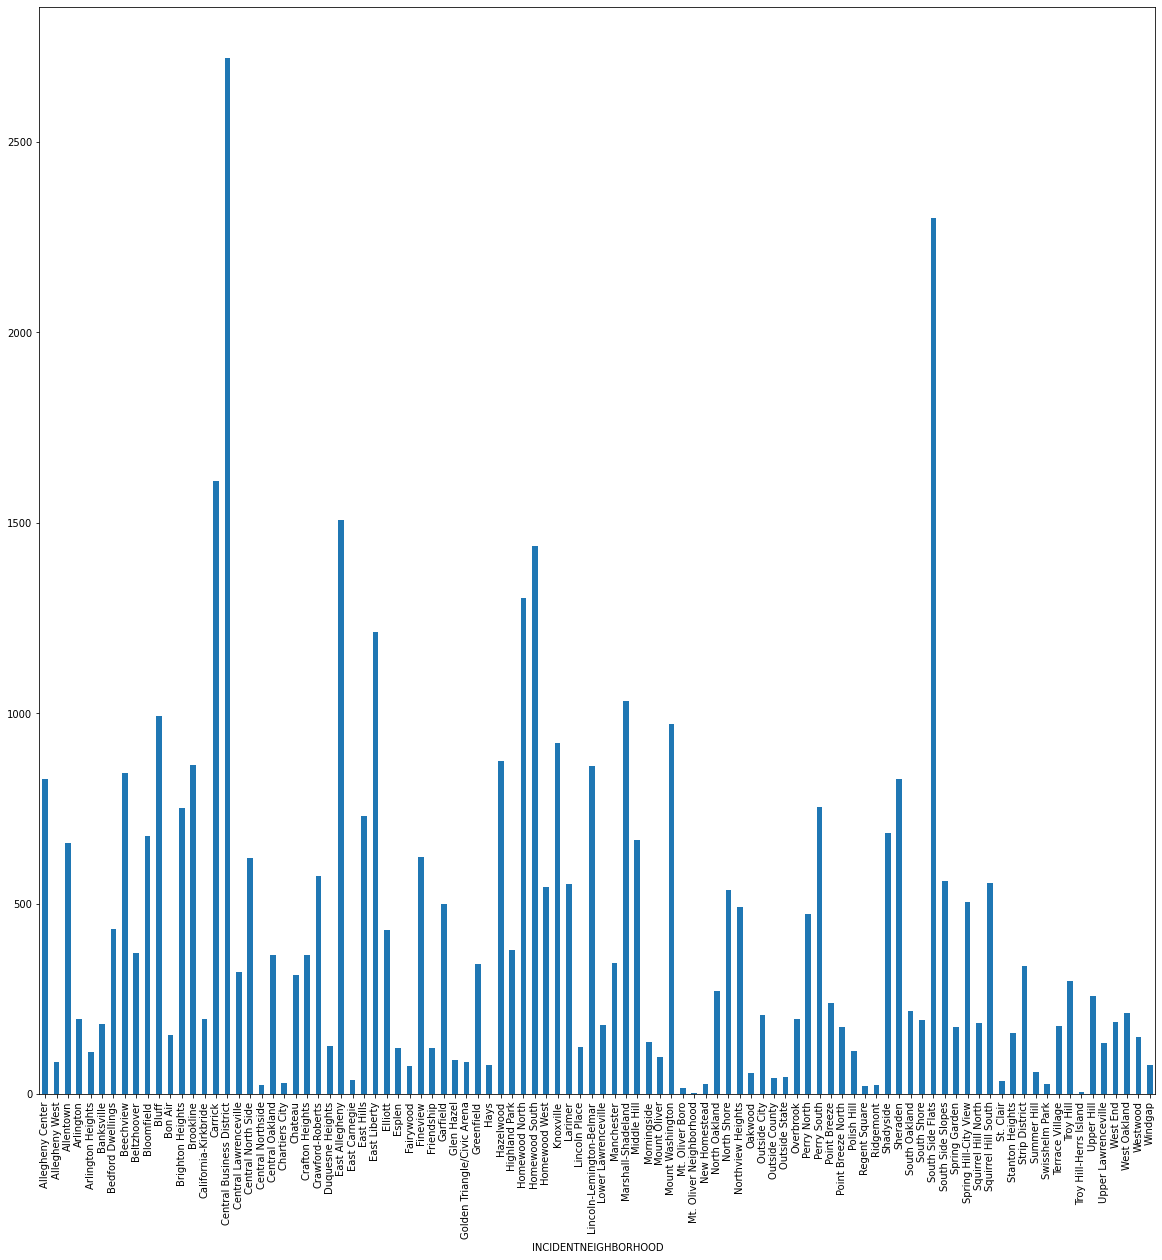

In [67]:
temp = check['ARRESTTIME'].count()
dTemp = DataFrame(temp)
dTemp = dTemp.sort_values(['ARRESTTIME'], ascending=1)
print(dTemp[0:5])
temp.plot(x='INCIDENTNEIGHBORHOOD', kind='bar', figsize=(20, 20))

By this metric Mt. Oliver is the best neighborhood in Pittsburgh. However, it is important to note that not all crime is equal. We care more about crimes that more significantly impact the safety of the neighborhood, i.e. violent crimes. The National Institute of Justice defines violent crime as a crime in which the victim is inflicted with or threatened by violence. For this purpose we can use the most significant that are enumerated in the definition: rape, sexual assault, robbery, assault and murder. The following data looks specifically at these crimes.

In [68]:
nTemp = DataFrame(crimeData[crimeData['OFFENSES'].str.find('NaN') == -1])
vCrimeData = nTemp[nTemp['OFFENSES'].str.contains('Rape')]
vCrimeData = vCrimeData.merge(nTemp[nTemp['OFFENSES'].str.contains('Assault')], how='outer')
vCrimeData = vCrimeData.merge(nTemp[nTemp['OFFENSES'].str.contains('Robbery')], how='outer')
vCrimeData = vCrimeData.merge(nTemp[nTemp['OFFENSES'].str.contains('Murder')], how='outer')

In [69]:
SortedVCrimeData = vCrimeData.groupby('INCIDENTNEIGHBORHOOD')

                         ARRESTTIME
INCIDENTNEIGHBORHOOD               
Central Northside                 1
Mt. Oliver Neighborhood           1
Outside County                    1
Mt. Oliver Boro                   4
Outside State                     4


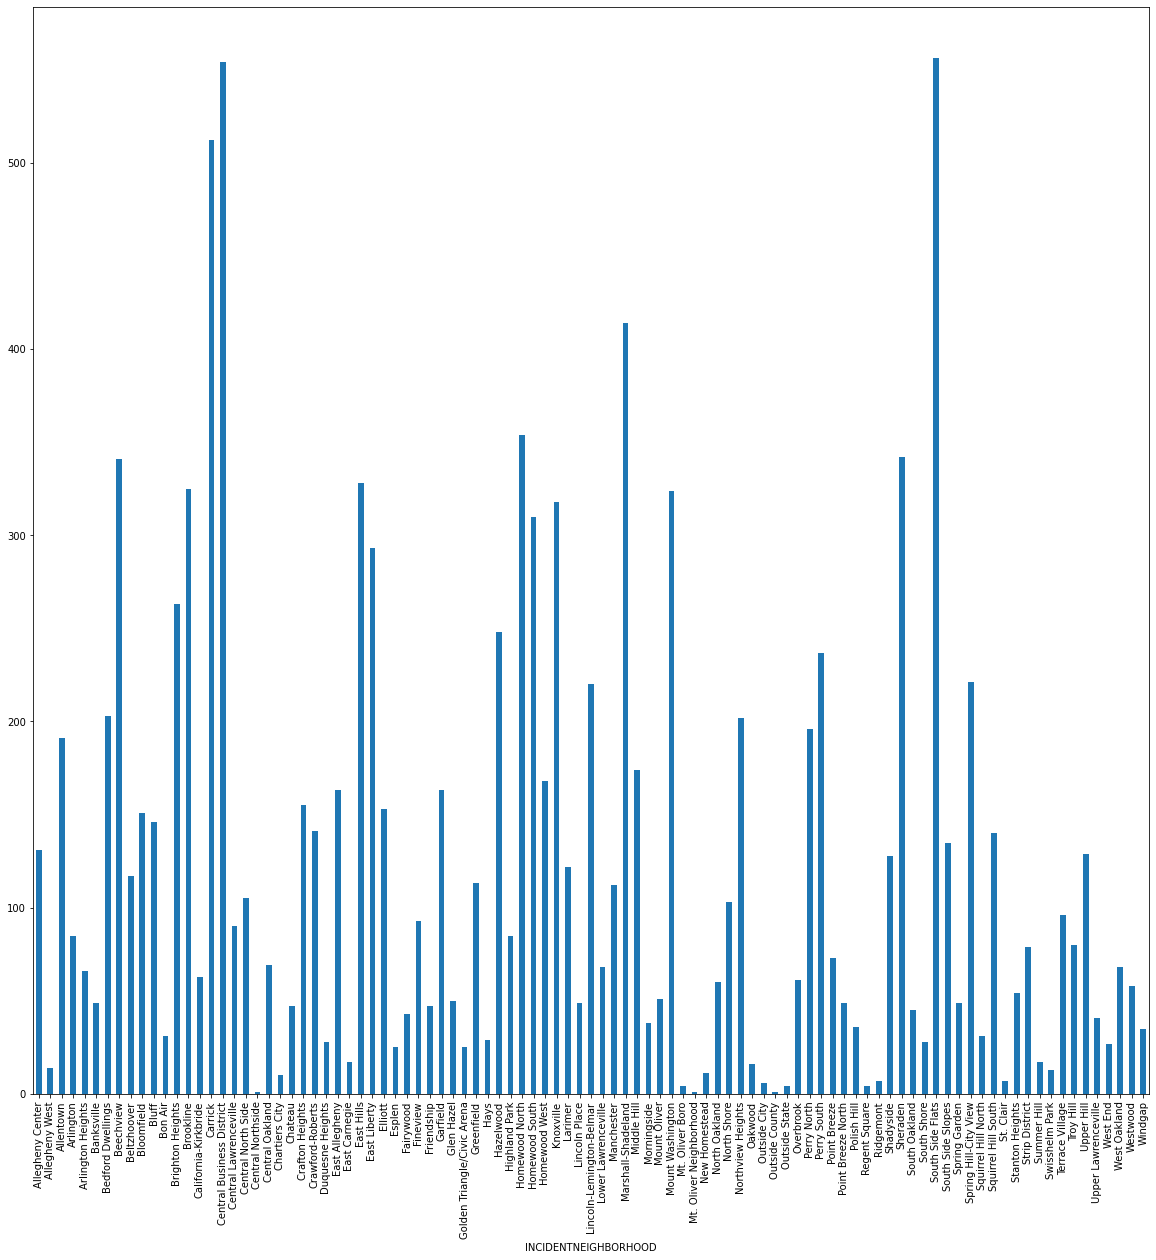

In [70]:
fTemp = SortedVCrimeData['ARRESTTIME'].count()
fDTemp = DataFrame(fTemp)
print(fDTemp.sort_values(['ARRESTTIME'], ascending=1)[0:5])
fTemp.plot(x='INCIDENTNEIGHBORHOOD', kind='bar', figsize=(20, 20))

When looking specifically at arrests for violent crimes, Mt. Oliver and Central Northside tie for the lowest number each having only one. However, this excludes Troy Hill-Herrs Island because there were no violent crime arrests in that neighborhood. Troy Hill-Herrs Island is the only neighborhood that does not appear on this graph.

## Conclusion

By both general arrests and arrests for violent crimes Troy Hill-Herrs Island is the best neighborhood in Pittsburgh. Troy Hill-Herrs Island doesn't even appear in the violent crime graph because there is no violent crime. Mt. Oliver Neighborhood comes in second with only one violent crime and the least general crime. Central Northside comes in third having the same violent crime, but more general crime.